In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,f1_score
from matplotlib import pyplot as plt
import pandas as pd
import re
import numpy as np
import warnings
import matplotlib
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Segregation of data in to training and test buckets
X_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes')).data
X_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes')).data
y_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes')).target
y_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes')).target

In [3]:
#Target Names
target_names = fetch_20newsgroups(subset='train').target_names
print(target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
tar_dict = {}
for i in range(len(target_names)):
    tar_dict[i] = target_names[i]

In [5]:
labels,counts = np.unique(y_train,return_counts=True)

In [6]:
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

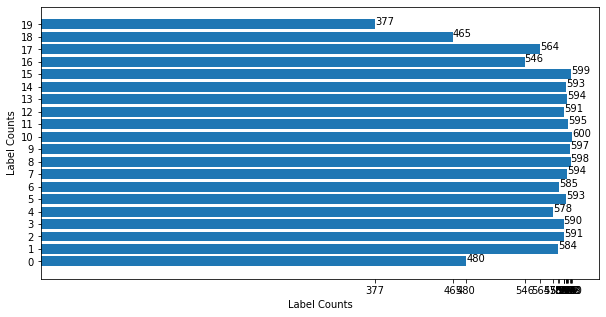

In [15]:
#Count Distribution on targets
fig = plt.figure(figsize=(10,5))
plt.barh(labels,counts)
plt.xlabel("Label Counts")
plt.ylabel("Label Counts")
ax1 = plt.subplot()
ax1.set_xticks(counts)
ax1.set_yticks(labels)
for ix,val in enumerate(counts):
    plt.text(val,ix,str(val))
plt.show()

In [21]:
def custom_preprocess(sen):
    '''Custom preprocessor to remove the numbers, Underscores and to 
        convert double spaces to single spaces'''
    pat=r'[\d_]'
    sen = re.sub(pat,'',sen.lower())
    pat2 =r' +'
    sen = re.sub(pat2,' ',sen)
    return sen

In [22]:
#To test custom preprocessor
s = "this is a test sen123456 __ _ fire fall"
t = custom_preprocess(s)
print(t)

this is a test sen fire fall


In [23]:
#Initialization of Count Vectorizer with custom preprocessor
cv = CountVectorizer(min_df=2,max_df = 0.85,stop_words='english',preprocessor = custom_preprocess)

In [24]:
#Generation of count sparse matrix
X_tr_vec = cv.fit_transform(X_train)
X_tst_vec = cv.transform(X_test)

In [8]:
#Sparse matrix Visualization
sparse_df = pd.DataFrame(X_tr_vec.toarray(), columns=cv.get_feature_names())
sparse_df.head(10)

,aa,aaa,aaf,aamir,aamrl,aao,aardvark,aarnet,aaron,aas,...,zwt,zx,zxa,zy,zyb,zyra,zyxel,zz,zzd,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Initialization of Multinomial Naive Bayes (Without Laplace Smoothing)
mnb_wl = MultinomialNB(alpha=0)
mnb_wl.fit(X_tr_vec,y_train)
y_pred = mnb_wl.predict(X_tst_vec)
print(accuracy_score(y_test,y_pred))

0.598380244291025


In [27]:
# Initialization of Multinomial Naive Bayes (With Laplace Smoothing)
mnb = MultinomialNB()
mnb.fit(X_tr_vec,y_train)
y_pred = mnb.predict(X_tst_vec)
print(accuracy_score(y_test,y_pred))

0.6481678173127987


Accuarcy is higher after using Laplace Smoothing

In [11]:
print(classification_report(y_test,y_pred,target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.55      0.46      0.50       319
           comp.graphics       0.53      0.72      0.61       389
 comp.os.ms-windows.misc       0.25      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.49      0.74      0.59       392
   comp.sys.mac.hardware       0.65      0.62      0.63       385
          comp.windows.x       0.65      0.75      0.69       395
            misc.forsale       0.83      0.69      0.75       390
               rec.autos       0.78      0.70      0.74       396
         rec.motorcycles       0.84      0.69      0.76       398
      rec.sport.baseball       0.90      0.80      0.85       397
        rec.sport.hockey       0.58      0.90      0.71       399
               sci.crypt       0.67      0.75      0.70       396
         sci.electronics       0.67      0.52      0.58       393
                 sci.med       0.83      0.78      0.80       396
         

In [79]:
#Classification new sentences
test = ['the mac apple computer hardware parts provided was excellent. It worked as expected. the graphics and processor speed was higher',
        'the astronauts in space galaxy planets international space station orbit explorer']

In [80]:
test_vec = cv.transform(test)
mnb.predict(test_vec)

array([ 4, 14])

In [85]:
print(target_names[4])
print(target_names[14])

comp.sys.mac.hardware
sci.space
